In [145]:
%%bash
echo Factor > /App/output/factor.data
echo Qtable1 > /App/output/qtable.data
echo Bsent > /App/output/bsent.data

cd /App/mininettest/ && python /App/mininettest/demo.py --scheduler rtt --rtt 0
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $(bc <<< "scale=2; $time") 

Process is interrupted.


## Testing Phase

In [119]:
%%bash
rm /App/logs/client.logs
echo RR > /App/output/random.csv
for i in $(seq 1 100)
do
cd /App/mininettest/ && python /App/mininettest/demo.py --scheduler random --rtt 0
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $time >> /App/output/random.csv
done

Process is terminated.


In [135]:
%%bash
rm /App/logs/client.logs
echo minRTT > /App/output/rtt.csv
for i in $(seq 1 200)
do
cd /App/mininettest/ && python /App/mininettest/demo.py --scheduler rtt --rtt 0
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $time >> /App/output/rtt.csv
done

In [136]:
%%bash
rm /App/logs/client.logs
echo ECF > /App/output/ecf.csv
for i in $(seq 1 200)
do
cd /App/mininettest/ && python /App/mininettest/demo.py --scheduler ecf --rtt 0
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $time >> /App/output/ecf.csv
done

In [137]:
%%bash
rm /App/logs/client.logs
echo BLEST > /App/output/blest.csv
for i in $(seq 1 200)
do
cd /App/mininettest/ && python /App/mininettest/demo.py --scheduler blest --rtt 0
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $time >> /App/output/blest.csv
done

In [138]:
%%bash
rm /App/logs/client.logs
echo M-Peek > /App/output/peekaboo.csv
for i in $(seq 1 200)
do
cd /App/mininettest/ && python /App/mininettest/demo.py --scheduler peek --rtt 0
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $time >> /App/output/peekaboo.csv
done

In [139]:
%%bash
rm /App/logs/client.logs
echo Factor > /App/output/factor.data
echo Qtable1 > /App/output/qtable.data
echo Bsent > /App/output/bsent.data

echo SATO > /App/output/qlearning.csv
for i in $(seq 1 200)
do
cd /App/mininettest/ && python /App/mininettest/demo.py --scheduler qlearning --rtt 0
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $time >> /App/output/qlearning.csv
done

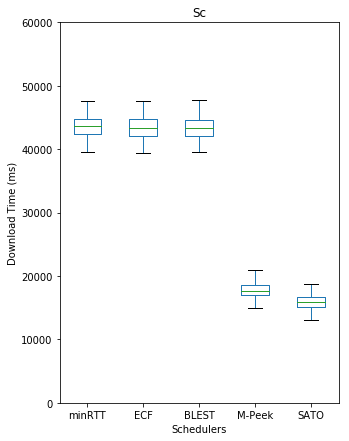

In [142]:
import pandas

random = pandas.read_csv("/App/output/random.csv")
rtt = pandas.read_csv("/App/output/rtt.csv")
ecf = pandas.read_csv("/App/output/ecf.csv")
blest = pandas.read_csv("/App/output/blest.csv")
peekaboo = pandas.read_csv("/App/output/peekaboo.csv")
qlearning = pandas.read_csv("/App/output/qlearning.csv")

result = pandas.concat([(rtt), (ecf), (blest), (peekaboo), (qlearning)], axis=1)
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(5, 7)

result.plot.box(showfliers=False)

plt.ylabel("Download Time (ms)")
plt.ylim(top=60000, bottom=0)
plt.xlabel("Schedulers")
plt.title("Sc")
#plt.xticks([])
plt.show()


In [51]:
import seaborn as sns; sns.set()
qtable = sns.load_dataset("/App/output/rtt.csv")

#result = sns.concat([(qtable), (qtable)], axis=1)

figsize(9, 7)

result.plot.box(sym='+')

plt.ylabel("Completion Time (ms)")
plt.ylim(top=8000, bottom=0)
plt.xlabel("Schedulers")
plt.title("Completion time of different schedulers")
plt.show()


ImportError: No module named seaborn